In [ ]:
!pip install flask

In [ ]:
!pip install joblib

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.model_selection import KFold,cross_val_score
k_folds=KFold(n_splits=5)
import joblib
import flask

In [ ]:
from sklearn.datasets import load_breast_cancer
cancer=load_breast_cancer()
x=cancer.data
x=x[:,:2]
y=cancer.target
y_name=cancer.target_names
xd=pd.DataFrame(x)
print(x)
lbl=cancer.target_names

[[17.99 10.38]
 [20.57 17.77]
 [19.69 21.25]
 ...
 [16.6  28.08]
 [20.6  29.33]
 [ 7.76 24.54]]


<Axes: >

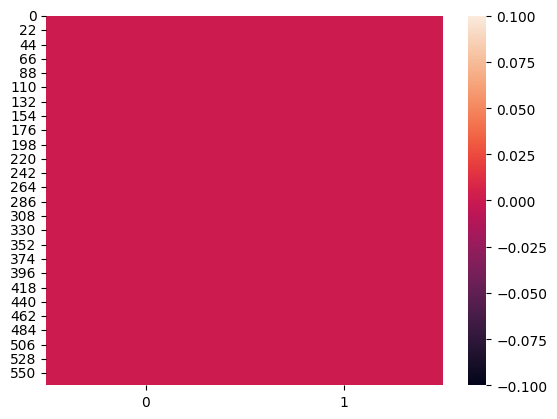

In [ ]:
sns.heatmap(xd.isnull())

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.2,random_state=0)

In [ ]:
from sklearn.inspection import DecisionBoundaryDisplay
from sklearn.svm import SVC
svm_model=SVC(kernel="rbf",gamma=.001,C=1)
svm_model.fit(x_train,y_train)

SVC(C=1, gamma=0.001)

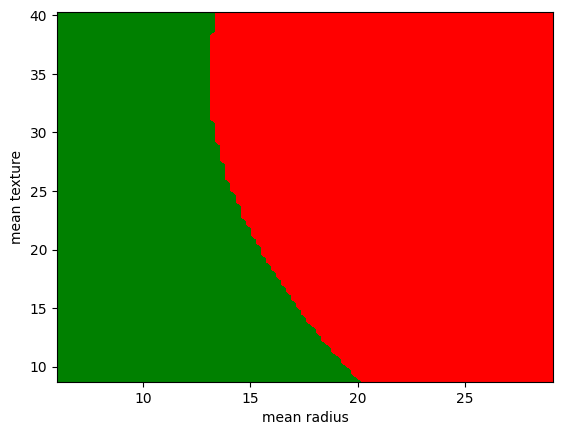

In [ ]:
import matplotlib.colors
mycol=matplotlib.colors.ListedColormap(['red','green'])
DecisionBoundaryDisplay.from_estimator(
    svm_model,
    x,
    response_method="predict",
    xlabel=cancer.feature_names[0],
    ylabel=cancer.feature_names[1],
    cmap=mycol

)

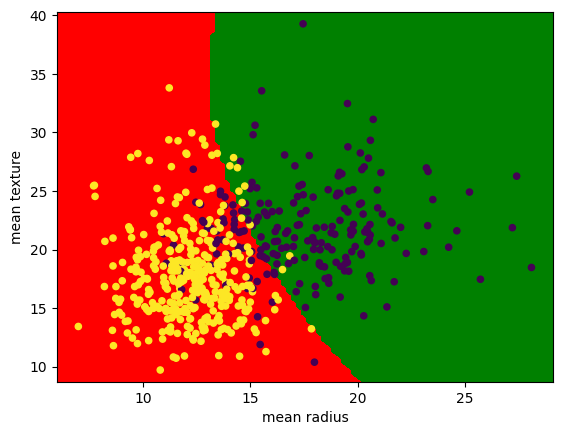

In [ ]:
import matplotlib.colors
cmap=matplotlib.colors.ListedColormap(["green","red"])
DecisionBoundaryDisplay.from_estimator(
svm_model,
x,
response_method="predict",
cmap=cmap,
xlabel=cancer.feature_names[0],
ylabel=cancer.feature_names[1]

)

plt.scatter(x[:,0],x[:,1],c=y,s=20)

In [ ]:
yp=svm_model.predict([[10,10]])

print(lbl[yp[0]])

benign


In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier(n_estimators=10)
rf.fit(x_train,y_train)


RandomForestClassifier(n_estimators=10)

In [ ]:
score=cross_val_score(rf,x_test,y_test,cv=k_folds)
print(score)
print("Avg",score.mean())
y_pred=rf.predict(x_test)
from sklearn.metrics import classification_report
cr=classification_report(y_test,y_pred)
print(cr)


[0.82608696 0.95652174 0.82608696 1.         0.77272727]
Avg 0.8762845849802371
              precision    recall  f1-score   support

           0       0.85      0.85      0.85        47
           1       0.90      0.90      0.90        67

    accuracy                           0.88       114
   macro avg       0.87      0.87      0.87       114
weighted avg       0.88      0.88      0.88       114



In [ ]:
model=rf
joblib.dump(model,"model.pkl")

['model.pkl']